# Getting to know the data

In [12]:
import numpy as np
import pandas as pd

import os
os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# reading the dataset

data = pd.read_csv('online_shoppers_intention.csv')

# checking the shape of the data
data.shape

(12330, 18)

In [3]:
# Getting a sense of what the data looks like
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Count isntances of missing data (both columns and rows)
data.isnull().sum().sum()

0

## Exploratory Data Analysis
Since we are interested in predicting whether a customer's website visit is revenue-generating, we will first look at the distribution of Revenue in the dataset. Then, we will explore the relationships between Revenue and other notable features in the dataset.

### Revenue

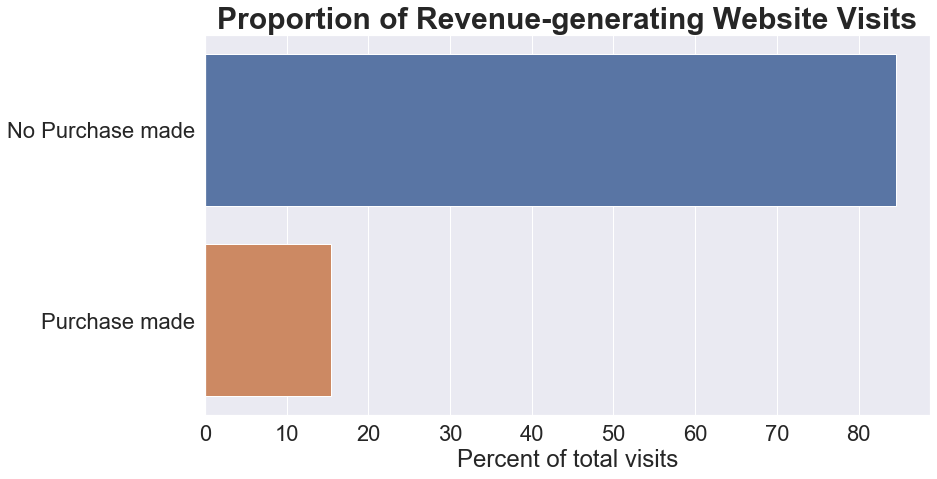

In [72]:
#percent stacked barplot
sns.set_style("white")
sns.set(font_scale = 2)
dat2 = data.groupby('Revenue').agg({'Revenue':['count']}).reset_index()
dat2.columns = ['Revenue', 'count']
dat2['pct'] = dat2['count']*100/(sum(dat2['count']))
x = dat2['Revenue']
y = dat2['pct']
palette = 'deep'
fig, ax = plt.subplots(figsize = (13,7))
fig = sns.barplot(y, x, estimator = sum, ci = None, orient='h', palette=palette)
y_lab = ['No Purchase made', 'Purchase made']
ax.set_yticklabels(labels=y_lab, ha='right')
plt.title('Proportion of Revenue-generating Website Visits',size = 30, weight = 'bold')
plt.ylabel('')
plt.xlabel('Percent of total visits');

Notice that there is a significant class imbalance: only 15% instances in the data are Revenue-generating. The Revenue-generating class, or the positive class, is also the one we are interested in predicting. This imbalance in the data will present problems in predictive models later on.  

### PageValues

[Text(0, 0, 'No Purchase'), Text(0, 0, 'Purchase')]

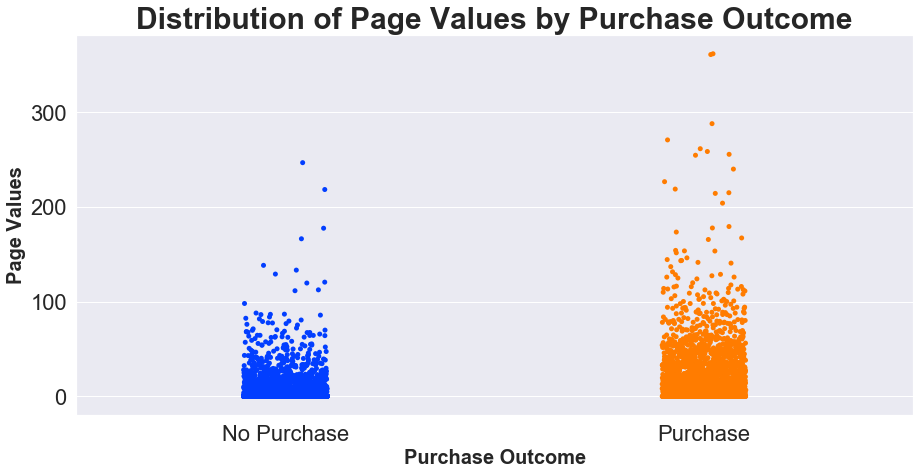

In [74]:
 # Scatterplot exploring relationship between PageValues and Revenue (Matplotlib)
sns.set(font_scale = 2)
plt.rcParams['figure.figsize'] = (15, 7)
pv = sns.stripplot(data['Revenue'], data['PageValues'], palette = 'bright')
plt.title('Distribution of Page Values by Purchase Outcome', fontsize = 30, fontweight='bold')
plt.xlabel('Purchase Outcome',fontsize = 20, fontweight='bold')
plt.ylabel('Page Values', fontsize = 20, fontweight='bold')
pv.set_xticklabels(["No Purchase", "Purchase"])

[Text(0, 0, 'No Purchase'), Text(0, 0, 'Purchase')]

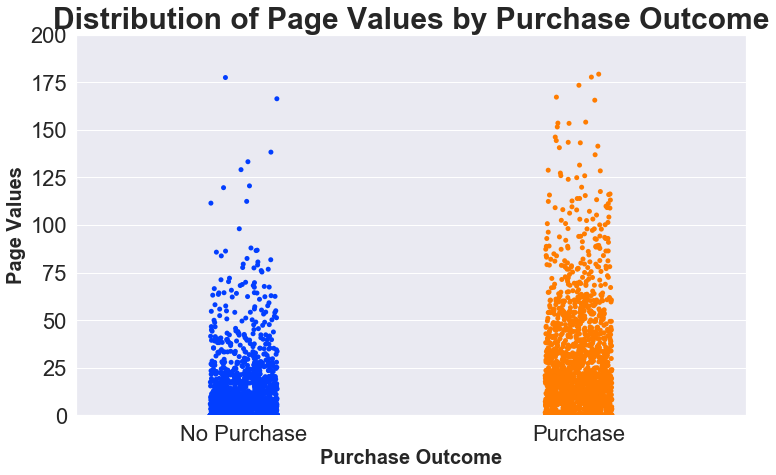

In [90]:
# Same plot but remove outliers
plt.ylim(0,200)
sns.set(font_scale = 2)
plt.rcParams['figure.figsize'] = (15, 7)
pv = sns.stripplot(data['Revenue'], data['PageValues'], palette = 'bright')
plt.title('Distribution of Page Values by Purchase Outcome', fontsize = 30, fontweight='bold')
plt.xlabel('Purchase Outcome',fontsize = 20, fontweight='bold')
plt.ylabel('Page Values', fontsize = 20, fontweight='bold')
pv.set_xticklabels(["No Purchase", "Purchase"])

### BounceRates and ExitRates

[Text(0, 0, 'No Purchase'), Text(0, 0, 'Purchase')]

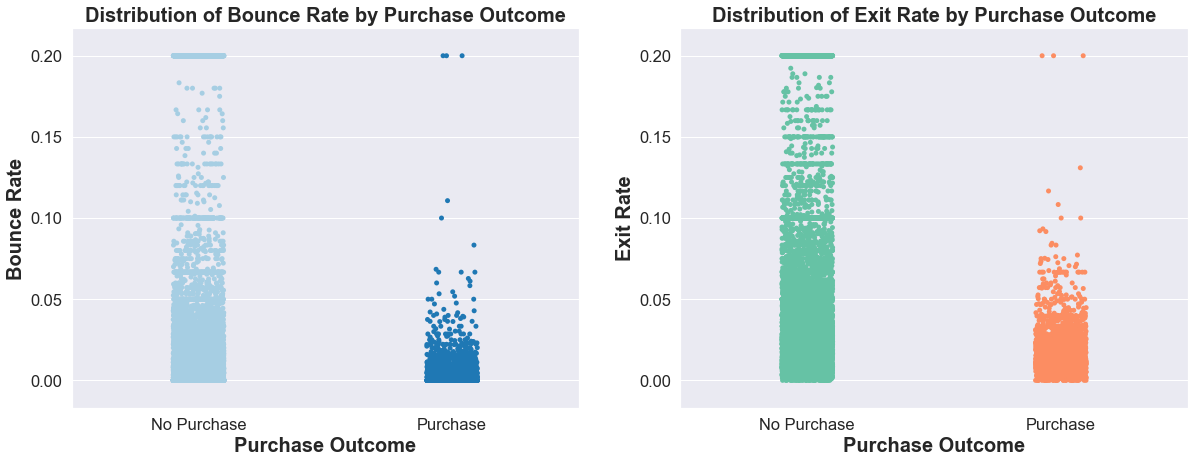

In [78]:
# BounceRates vs Revenue
sns.set(font_scale = 1.5)
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (25, 7)
b = sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'Paired')
plt.title('Distribution of Bounce Rate by Purchase Outcome', fontsize = 20, fontweight='bold')
plt.xlabel('Purchase Outcome', fontsize = 20, fontweight='bold')
plt.ylabel('Bounce Rate', fontsize = 20, fontweight='bold')
b.set_xticklabels(["No Purchase", "Purchase"])

# ExitRates vs Revenue
plt.subplot(1,2, 2)
r = sns.stripplot(data['Revenue'], data['ExitRates'], palette = 'Set2')
plt.title('Distribution of Exit Rate by Purchase Outcome', fontsize = 20, fontweight='bold')
plt.xlabel('Purchase Outcome', fontsize = 20, fontweight='bold')
plt.ylabel('Exit Rate', fontsize = 20, fontweight='bold')
r.set_xticklabels(["No Purchase", "Purchase"])

### Weekend and SpecialDay

[Text(0, 0, '0.0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1.0')]

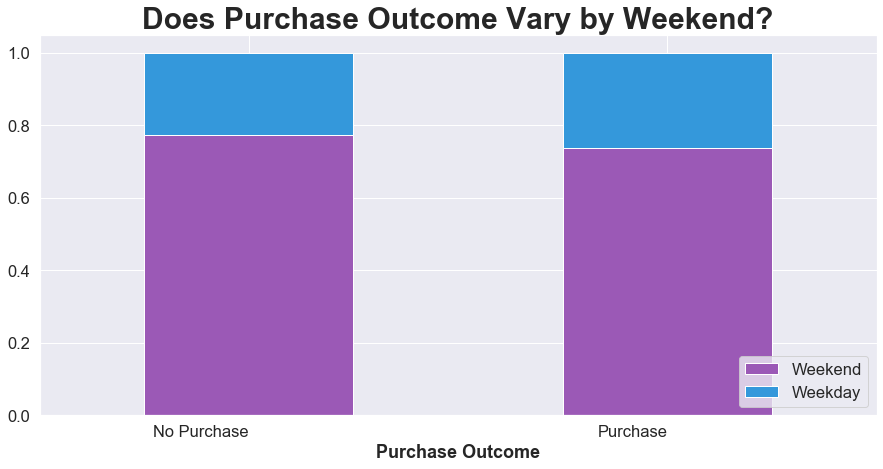

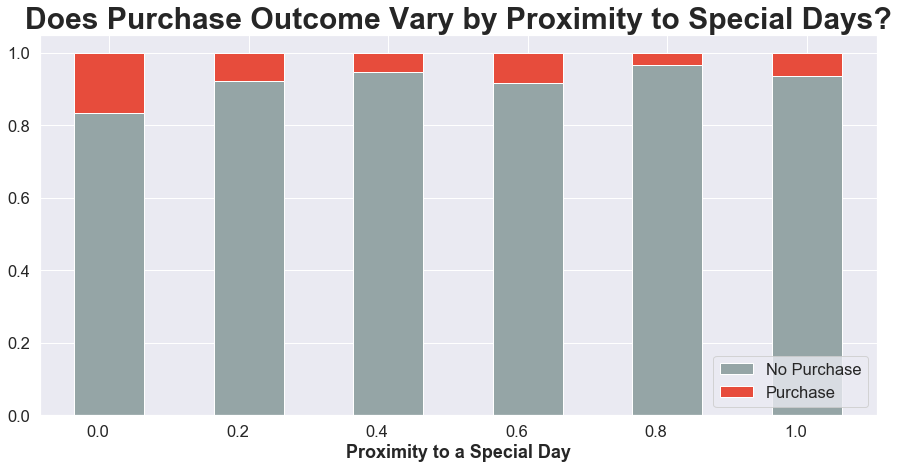

In [86]:
# Weekend vs Revenue
#df1 = pd.crosstab(data['Weekend'], data['Revenue'])
#df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 7), color = ["#9b59b6", "#3498db"])
#plt.title('How Weekend Might Impact Revenue', fontsize = 20, fontweight='bold')

df1 = pd.crosstab(data['Revenue'], data['Weekend'])
wk = df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 7), color = ["#9b59b6", "#3498db"])
plt.title('Does Purchase Outcome Vary by Weekend?', fontsize = 30, fontweight='bold')
plt.xlabel('Purchase Outcome', fontsize = 18, fontweight='bold')
wk.set_xticklabels(["No Purchase", "Purchase"], rotation = 0, horizontalalignment='right')
plt.legend(["Weekend", "Weekday"],loc = "lower right")

# SpeciaDays vs Revenue
df2 = pd.crosstab(data['SpecialDay'], data['Revenue'])
sd = df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 7), color = [ "#95a5a6", "#e74c3c"])
plt.title('Does Purchase Outcome Vary by Proximity to Special Days?', fontsize = 30, fontweight='bold')
plt.xlabel('Proximity to a Special Day', fontsize = 18, fontweight='bold')
plt.legend(["No Purchase", "Purchase"],loc = "lower right")
sd.set_xticklabels(sd.get_xticklabels(),rotation=0,horizontalalignment='right')

### VisitorType

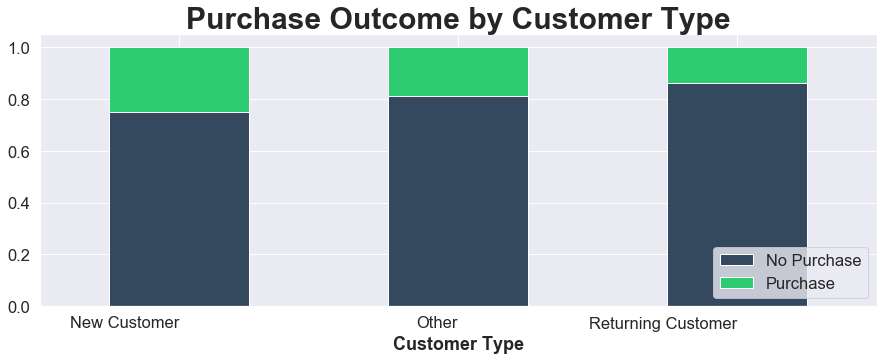

In [84]:
# VisitorType vs Revenue

df3 = pd.crosstab(data['VisitorType'], data['Revenue'])
vt = df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ["#34495e", "#2ecc71"])
plt.title('Purchase Outcome by Customer Type',fontsize = 30, fontweight='bold')
plt.xlabel('Customer Type', fontsize = 18, fontweight='bold')
vt.set_xticklabels(["New Customer", "Other", "Returning Customer"], rotation=0, horizontalalignment='right')
plt.legend(["No Purchase", "Purchase"],loc = "lower right")

# Predictive Model 

## Data Preprocessing

In [95]:
# one hot encoding 
data1 = pd.get_dummies(data)
data1.columns

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data['Revenue'] = lab.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [96]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

### Split data into training and test sets

In [97]:
training_features, test_features, \
training_target, test_target, = train_test_split(data1.drop(['Revenue'], axis=1),
                                               data1['Revenue'],
                                               test_size = .2,
                                               random_state=12)

In [98]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .2,
                                                  random_state=12)

### Oversampling with SMOTE
To address the class imbalance in Revenue, we will perform oversampling on the minority class ("Purchase") to improve the predictive power of the model. 

In [99]:
sm = SMOTE(random_state=12, ratio = 0.4)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

## Decision Tree Model

In [100]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train, setting maximum depth at 6 to prevent overfitting
tree = DecisionTreeClassifier(random_state=21, max_depth = 6)
# Train tree
tree.fit(x_train_res, y_train_res)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 91 nodes with maximum depth 6.


In [101]:
# Make probability predictions
train_probs = tree.predict_proba(x_train_res)[:, 1]
probs = tree.predict_proba(x_val)[:, 1]

train_predictions = tree.predict(x_train_res)
predictions = tree.predict(x_val)

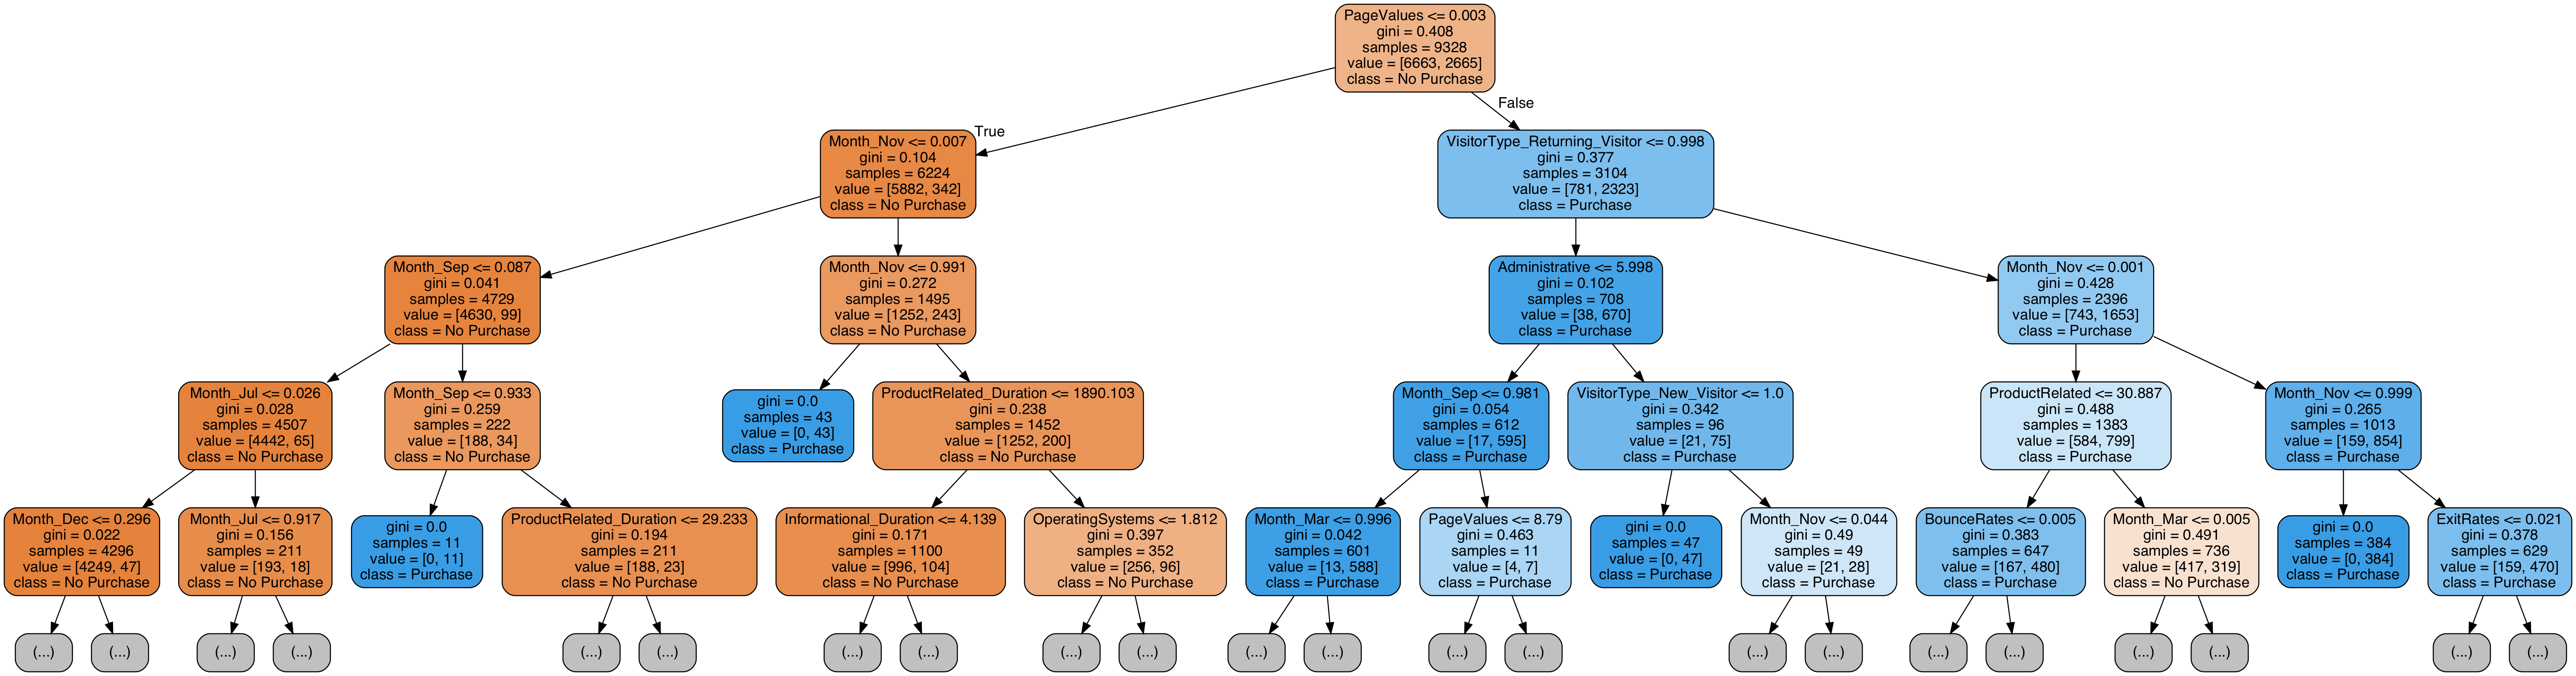

In [102]:
#Visualize the decision tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = list(training_features.columns), max_depth = 4,
                class_names = ['No Purchase', 'Purchase'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

### Tree Evaluation

Validation Results
0.9082615306639635
0.7416107382550335

Training Results
0.9002433090024331
0.725130890052356
              precision    recall  f1-score   support

       False       0.95      0.94      0.95      1675
        True       0.68      0.74      0.71       298

    accuracy                           0.91      1973
   macro avg       0.82      0.84      0.83      1973
weighted avg       0.91      0.91      0.91      1973



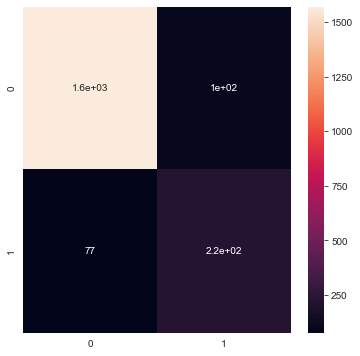

In [164]:
print('Validation Results')
print(tree.score(x_val, y_val))
print(recall_score(y_val, tree.predict(x_val)))
print('\nTraining Results')
print(tree.score(test_features, test_target))
print(recall_score(test_target, tree.predict(test_features)))

# confusion matrix
cm = confusion_matrix(y_val, predictions)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_val, predictions)
print(cr)

The decision tree model has shown to perform with good accuracy and a decent recall rate, however, there are questions regarding whether this model will perform well on new data. We will explore an alternative model using the Random Forest classifier method to address this issue.

## Random Forest Classififer

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
clf_rf = RandomForestClassifier(n_estimators=80)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### RF Model Evaluation

Validation Results
0.9087683730359858
0.6677852348993288

Training Results
0.9087591240875912
0.6544502617801047

Training Accuracy : 1.0
Validation Accuracy : 0.9087683730359858
              precision    recall  f1-score   support

       False       0.94      0.95      0.95      1675
        True       0.71      0.67      0.69       298

    accuracy                           0.91      1973
   macro avg       0.83      0.81      0.82      1973
weighted avg       0.91      0.91      0.91      1973



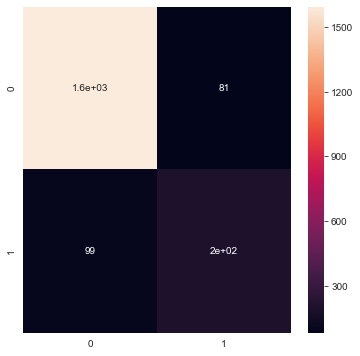

In [127]:
y_pred = clf_rf.predict(x_val)

# evaluating the model
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))
print('\nTraining Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

print("\nTraining Accuracy :", clf_rf.score(x_train_res, y_train_res))
print("Validation Accuracy :", clf_rf.score(x_val, y_val))

# confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_val, y_pred)
print(cr)

### Feature Selection with Permutation Importance 

In [134]:
#conda install -c conda-forge eli5    #if eli5 has not been installed
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_rf, random_state = 0).fit(x_val, y_val)
eli5.show_weights(perm, feature_names = x_val.columns.tolist())

Weight,Feature
0.1488 ± 0.0092,PageValues
0.0071 ± 0.0037,Month_Nov
0.0058 ± 0.0023,ProductRelated
0.0044 ± 0.0074,ExitRates
0.0023 ± 0.0029,TrafficType
0.0022 ± 0.0018,VisitorType_Returning_Visitor
0.0021 ± 0.0052,Month_May
0.0017 ± 0.0049,BounceRates
0.0011 ± 0.0015,VisitorType_New_Visitor
0.0010 ± 0.0039,Administrative


In [136]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(PermutationImportance(RandomForestClassifier(), cv=6),threshold=0.001,).fit(x_train_res, y_train_res)
x_train2 = sel.transform(x_train_res)
x_test2 = sel.transform(x_val)
rf = RandomForestClassifier(n_estimators=80)
rf.fit(x_train2, y_train_res)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Validation Results
0.9052204764318297
0.6409395973154363

Training Accuracy : 1.0
Validation Accuracy : 0.9052204764318297
              precision    recall  f1-score   support

       False       0.94      0.95      0.94      1675
        True       0.70      0.64      0.67       298

    accuracy                           0.91      1973
   macro avg       0.82      0.80      0.81      1973
weighted avg       0.90      0.91      0.90      1973



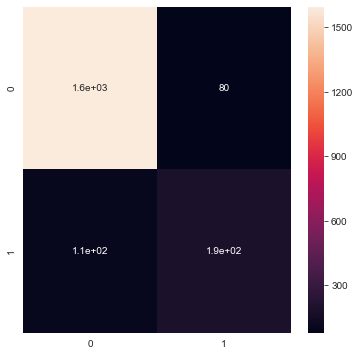

In [139]:
y_pred = rf.predict(x_test2)

# evaluating the model
print('Validation Results')
print(rf.score(x_test2, y_val))
print(recall_score(y_val, rf.predict(x_test2)))


print("\nTraining Accuracy :", rf.score(x_train2, y_train_res))
print("Validation Accuracy :", rf.score(x_test2, y_val))

# confusion matrix
cm2 = confusion_matrix(y_val, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm2 ,annot = True)

# classification report
cr2 = classification_report(y_val, y_pred)
print(cr2)

## SHAP values for optimized Random Forest

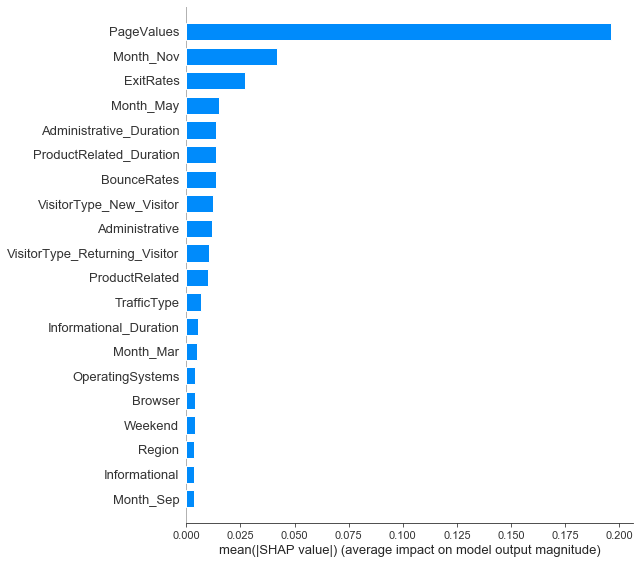

In [167]:
# importing shap
import shap

explainer = shap.TreeExplainer(clf_rf)
shap_values = explainer.shap_values(x_val)

shap.summary_plot(shap_values[1], x_val, plot_type = 'bar')

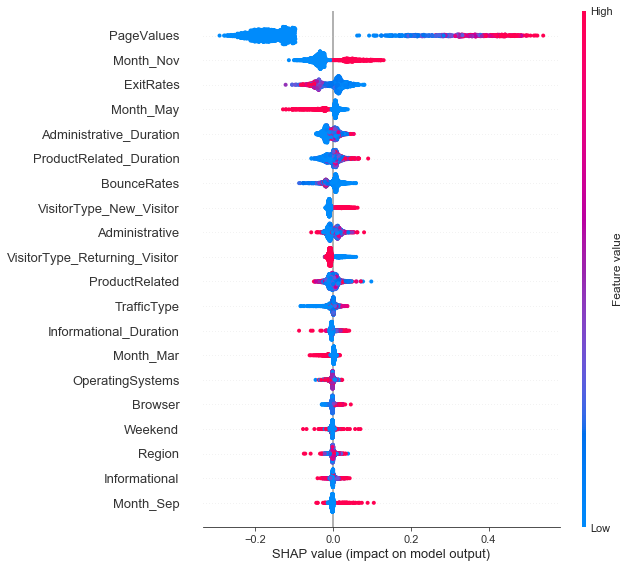

In [142]:
shap.summary_plot(shap_values[1], x_test2)

## In the future
1. Build a regression based on no. of visits in recent time
2. Find probability of purchase instead of classification problem